## Welcome to Week 0!

Live sessions during this course will be oriented primarily around:

1.   Lecture
2.   Programming in [Jupyter notebooks](https://jupyter.org/) like the one you're in now.

We will release notebooks on Mondays. Before lecture, you should download the .ipynb file, and open it either locally on your own machine or in Google Colab. It's a good idea to skim the notebook to get a sense for what it covers, but **don't start working on it before lecture**--the idea is for you to starting working on these **in class** (with the instructors and, more importantly, with your classmates).

---

This week we have some warm-up excercises to go through so that we can all practice using notebooks and some other tools that will be used throughout the course.

*   Google Colab is a tool for editing and running Jupyter notebooks using Google's infrastructure. For most of you, using Colab to edit and run notebooks will make your life easier, especially after week 5 of the course.
*   We're asking you to do Week 0's assignment (this one) in Colab, but after today you **aren't required to use it**.


### Task 1 -- Mounting your Google Drive and loading in the data
*   Make a folder in Google Drive where you can put content for the course. Then
download the .ipynb file released in Canvas, along with any accompanying data (this week the data is `time_series_covid_19_confirmed.csv`).
*   Upload these to your Google Drive folder, and open the .ipynb file in Colab:

  <img src='https://drive.google.com/uc?id=1qIfHxtBqfIhnRblvBQMZKAIJrS8ne4Ik' width="400">


Now connect this Colab notebook to your Google Drive and load in the COVID data. There are [several ways to do this](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=c2W5A2px3doP), but just follow along with the two options we present below:

In [1]:
import pandas as pd
# use this to wrangle .csv files


---

**Option 1: mounting locally**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

^^ This mounts your Google Drive at the location */content/drive* on the virtual machine running this notebook.

In [ ]:
# my copy of the COVID data is located in my drive at Datasets/week_0/time_series_covid_19_confirmed.csv
data = pd.read_csv('/content/drive/My Drive/FourthBrain/Wk0/time_series_covid_19_confirmed.csv')


---
**Option 2: use the PyDrive library**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Get the unique identifier for the file containing COVID data in your Google Drive: 

1.   Right-click on the name of the file 
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary element of the call to `drive.CreateFile()` below.

In [ ]:
downloaded = drive.CreateFile({'id':'1JhOQPocfG8UzzpTu5GYccBzRE7GV5neE'})
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

^^ This should have **created** a file called `time_series_covid_19_confirmed.csv` in the current directory on the virtual machine. Now you can load it from there:

In [2]:
data = pd.read_csv('time_series_covid_19_confirmed.csv')



---

### Task 2 -- Get familiar with the data


In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [5]:
data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,17989,18313,18476,18802,19213,19678,20155,20677,21251,21668
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1899,1906,1907,1911,1916,1924,1930,1933,1943,1946
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,10372,10627,10831,11082,11148,11285,11376,11601,11779,11902
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,5745,5815,5893,5930,6070,6196,6251,6292,6388,6406


In [6]:
data.shape

(266, 225)

In [7]:
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,8.524560e+04,8.626335e+04,8.722006e+04,8.803567e+04,8.888655e+04,8.979638e+04,9.087815e+04,9.192740e+04,9.298665e+04,9.397164e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,4.488150e+05,4.538117e+05,4.591257e+05,4.630888e+05,4.670401e+05,4.717422e+05,4.774629e+05,4.829942e+05,4.885157e+05,4.940581e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.587500e+02,3.602500e+02,3.690000e+02,3.870000e+02,4.027500e+02,4.087500e+02,4.175000e+02,4.225000e+02,4.357500e+02,4.442500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.447500e+03,2.467000e+03,2.467000e+03,2.567000e+03,2.544500e+03,2.596500e+03,2.616000e+03,2.704500e+03,2.746000e+03,2.795500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.915275e+04,2.972225e+04,2.988800e+04,2.998500e+04,3.006450e+04,3.016525e+04,3.032125e+04,3.043750e+04,3.054975e+04,3.064150e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,5.573847e+06,5.622470e+06,5.667070e+06,5.701645e+06,5.739536e+06,5.777710e+06,5.821819e+06,5.867785e+06,5.913941e+06,5.961094e+06


In [8]:
print(len(data['Country/Region'].unique()))
print(len(data['Province/State'].unique()))
print(len(data['Lat'].unique()))
print(len(data['Long'].unique()))
print(len( (data['Lat'].astype(str) + data['Long'].astype(str)).unique() ))

188
82
262
263
263


Write a few sentences describing what you notice about this data:

*The dataframe has 266 rows, but the number of unique "Country/Region" is only 188, so there appears to be repetition. Interestingly, neither "Lat" and "Long" are unique across all samples, and the str concatenation of "Lat""Long" is also not unique, suggesting data duplication or repeated entries for some locations. Some samples are missing "Province/State (NaN). There appears to be 221 days of infection numbers.*





Subsample the data so that it only uses 50 countries and the first 100 days

In [9]:
RAND_SEED = 2
data_subset = data.sample(50, random_state=RAND_SEED).iloc[:, :4+100]
data_subset.index = data_subset['Country/Region']
print(data_subset.shape)
data_subset.head()

(50, 104)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Hungary,NaN,Hungary,47.1625,19.5033,0,0,0,0,0,0,...,2098,2168,2284,2443,2443,2500,2583,2649,2727,2775
China,Tibet,China,31.6927,88.0924,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
France,Reunion,France,-21.1151,55.5364,0,0,0,0,0,0,...,410,410,412,412,417,417,418,418,420,420
Chad,NaN,Chad,15.4542,18.7322,0,0,0,0,0,0,...,33,33,33,40,46,46,46,52,52,73
Andorra,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745


Take a random subsample of 5 countries and plot infections vs time (you can report time as the number of days after January 22, 2020)

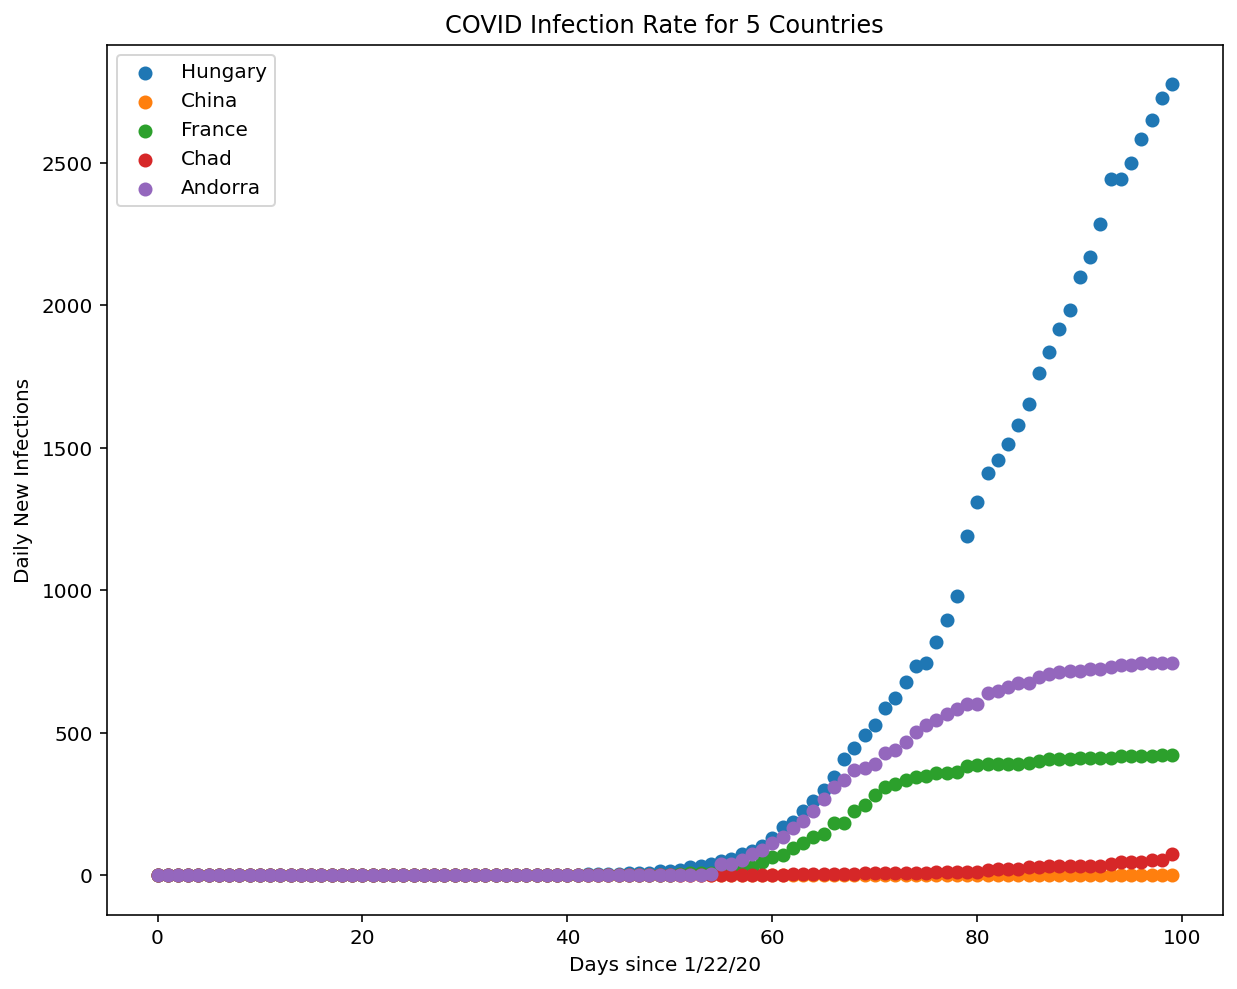

In [10]:
plt.figure(figsize=(10, 8))
for i in range(5):  # data_subset is already randomly sampled
    plt.scatter(np.arange(100), data_subset.iloc[i].values[4:], label=data_subset.iloc[i].name)
plt.title('COVID Infection Rate for 5 Countries')
plt.xlabel('Days since 1/22/20')
plt.ylabel('Daily New Infections')
plt.legend()
plt.show()

### Task 3 -- Set up a regression problem based on latitude, longitude, and date
Okay, so now we're going to see if the combination of latitude, longitude, and date can be used to accurately predict the number of infections in this dataset.

Start by creating two matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ holds the [latitude, longitude, date] data and $\mathbf{Y}$ holds the infection data. $\mathbf{X}$ will have shape $k \times 3$ and $\mathbf{Y}$ should have shape $k \times 1$. What is the value $k$, based on the size of the subsample from the full dataset that we've taken?


k = (50 countries X  100 days) = 5000

Create the matrices $\mathbf{X}$ and $\mathbf{Y}$ below:

In [11]:
countries = data_subset.shape[0]
days = data_subset.shape[1] - 4
print(f'{countries=}, {days=}')
k = countries * days
X = np.zeros((k, 3))
Y = np.zeros((k, 1))
# iterate through one country at a time
for country_idx in range(countries):
  X[country_idx * days : (country_idx + 1) * days, 0] = data_subset.iloc[country_idx, 2]  # latitude
  X[country_idx * days : (country_idx + 1) * days, 1] = data_subset.iloc[country_idx, 3]  # longitude
  X[country_idx * days : (country_idx + 1) * days, 2] = np.arange(days)  # days since 1/22/2020
  Y[country_idx * days : (country_idx + 1) * days, 0] = data_subset.iloc[country_idx, 4:]
print(X.shape, Y.shape)

countries=50, days=100
(5000, 3) (5000, 1)


Make a plot with 3 subplots, one for each of the independent variables (latitude, longitude, and date). Plot the data, displaying the independent variable on the x axis and the dependent variable (infections) on the y axis

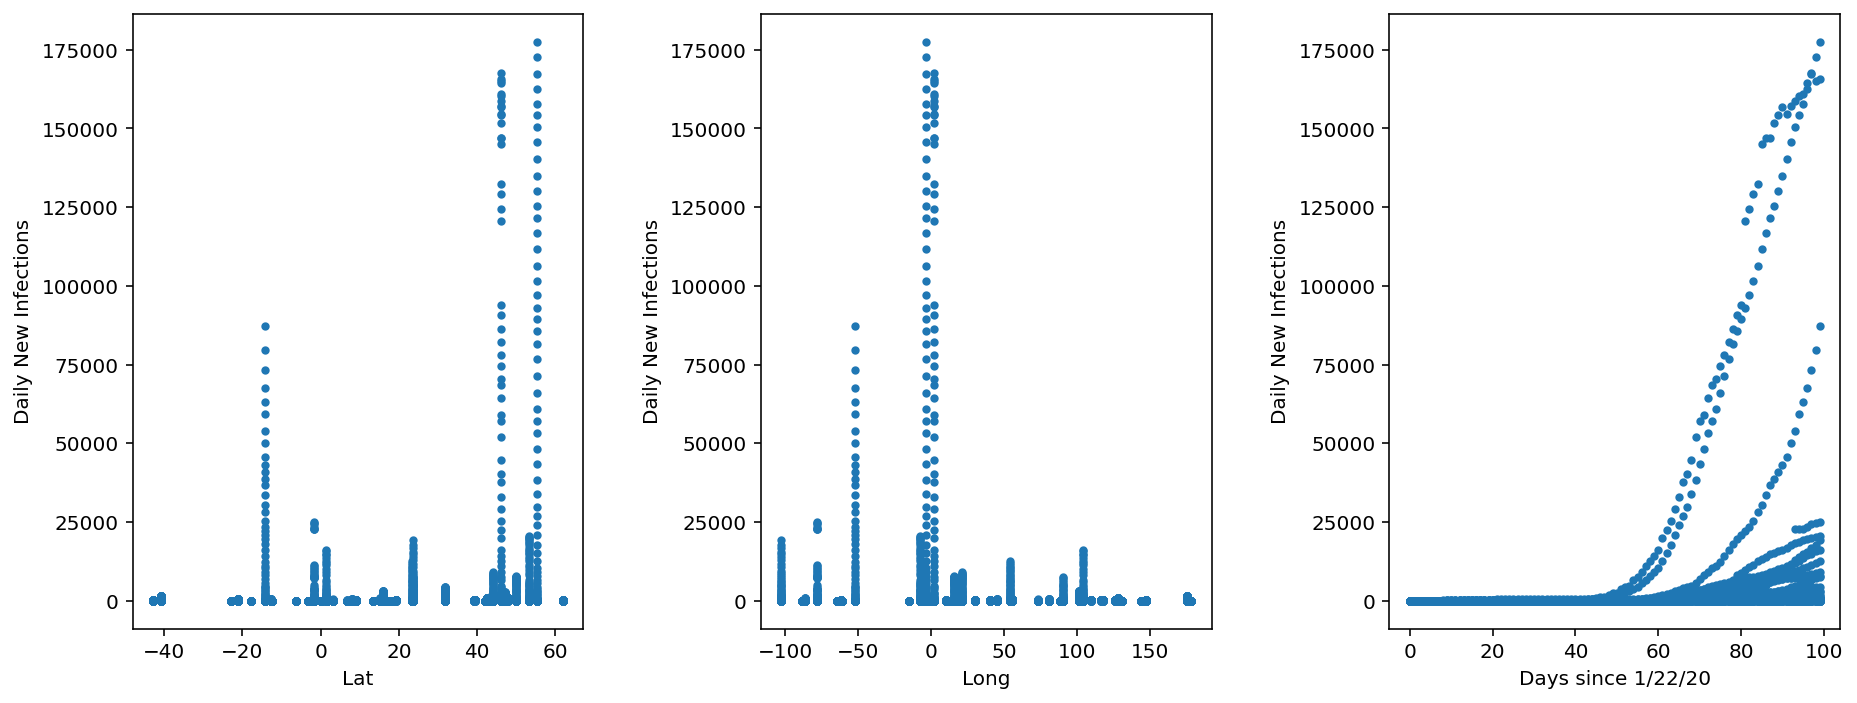

In [12]:
plt.figure(figsize=(13, 5))
for sp_idx, v_name in enumerate(['Lat', 'Long', 'Days since 1/22/20']):
  ax = plt.subplot(1, 3, sp_idx + 1)
  ax.scatter(X[:, sp_idx], np.squeeze(Y), s=10)
  ax.set_xlabel(v_name)
  ax.set_ylabel('Daily New Infections')
plt.tight_layout(w_pad=3)

Discuss with your classmates in your breakout room what you notice about this data. Are there other ways you might try to visualize it to uncover some structure? Does this data look like a good candidate for fitting a linear model?

*The distribution of Lat and Long in the data subset is not uniform. The range of daily new infections across the time interval varies greatly by country. Within each country, the infection rate seems to be growing (i.e. the dots lower down are more closely-packed that the dots further up). The growth of infection rate varies, some look exponential, some look linear, others look to be asymptotic. They also start their ramp up at different times.*



Now split the data randomly into training and test sets. Make the training set 70% of the data and the test set the remaining 30%. You could do this manually, but we'll use the `train_test_split` function from the machine learning library [scikit-learn](https://scikit-learn.org/stable/).

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RAND_SEED)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3500, 3) (1500, 3)
(3500, 1) (1500, 1)


^^ What is the `random_state` parameter doing? Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) on `train_test_split` to find out.

*random_state is use to initialize the random number generator used for shuffling/allocating the data into the test/train sets -- to facilitate model reproducibility*

Note: This week is a good time to get very familiar with scikit-learn, if you haven't already. We will be using it a fair amount in this course and it's a great resource for applying machine learning models.

### Task 4 -- Apply a polynomial regression of degree 3 to this data

You could do this manually using concepts we will cover next week, but for now let's use scikit-learn's `PolynomialFeatures` and `LinearRegression` modules.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
print("New shape of test data=", np.shape(X_test_poly))

lin_regression = LinearRegression()
# Fit the model on train data only
lin_regression.fit(X_train_poly, Y_train)
print("The regression coefficients are: ", lin_regression.coef_)
print("The intercept is", lin_regression.intercept_)

New shape of test data= (1500, 20)
The regression coefficients are:  [[ 0.00000000e+00 -2.18720890e+01 -2.86446374e+01 -5.94825619e+01
   2.73594198e+00  2.72497508e+00 -5.00849853e+00  3.52591933e-01
   1.03543239e+00 -7.95294491e-01 -5.15552628e-02 -6.65070659e-02
   1.17536897e-01 -6.08463709e-03 -9.92328103e-03  4.83902324e-02
   1.08314322e-03 -3.90178128e-03 -1.69963604e-02  1.99804303e-02]]
The intercept is [367.50491514]


Now use the `.predict()` method of the `lin_regression` object above to generate predictions on the test data. Compare the predictions to `Y_test` using a plot.

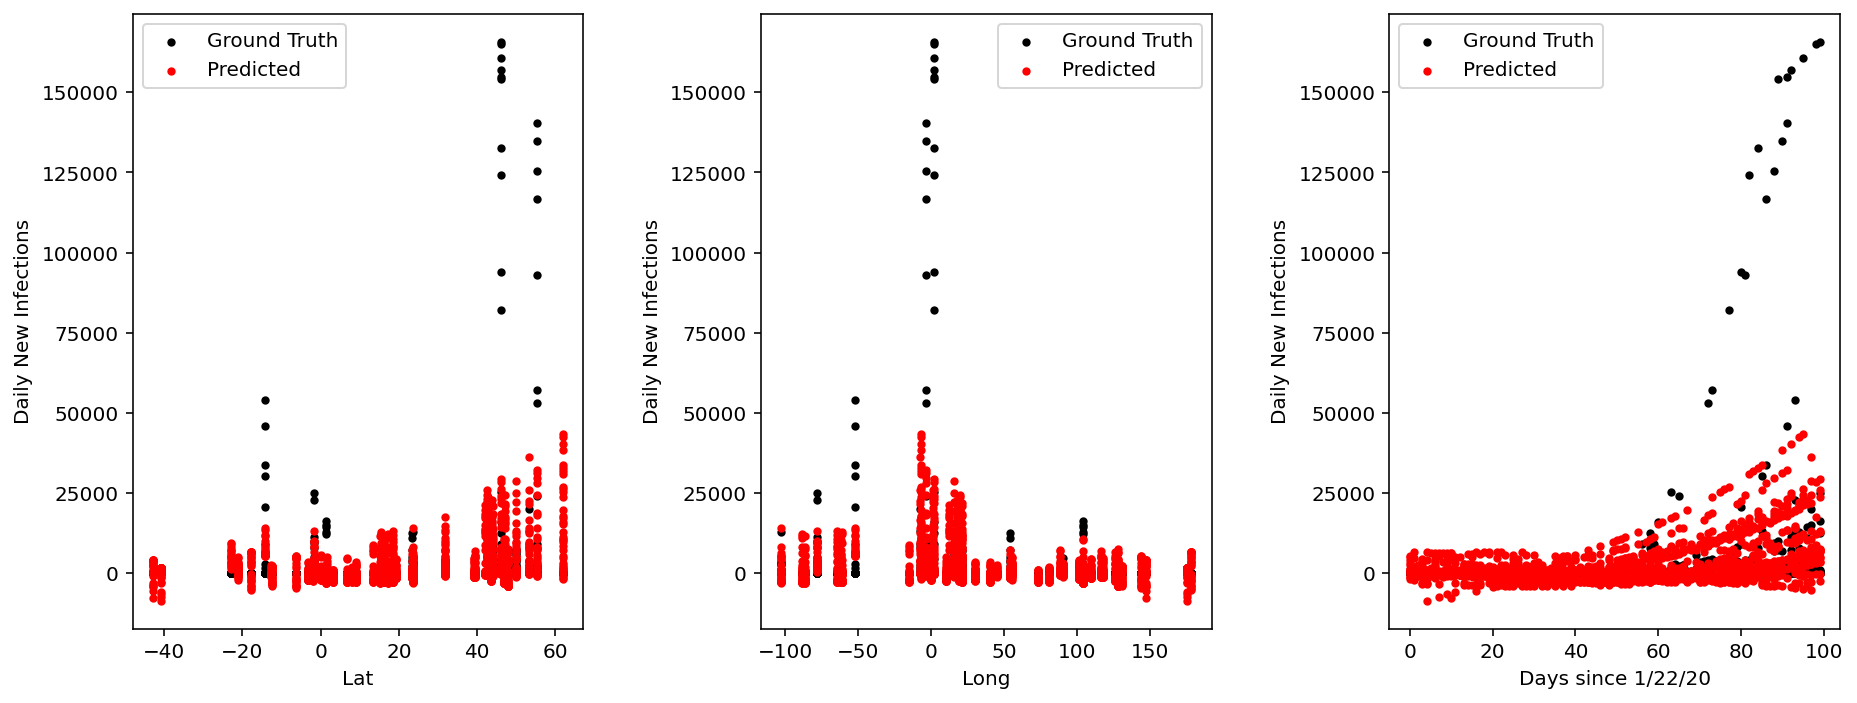

In [15]:
# Predict regression outcome on test data
Y_pred = lin_regression.predict(X_test_poly)

# we'll break this out into subplots for each dependent variable again
plt.figure(figsize=(13, 5))
for sp_idx, v_name in enumerate(['Lat', 'Long', 'Days since 1/22/20']):
  ax = plt.subplot(1, 3, sp_idx + 1)
  ax.scatter(X_test[:, sp_idx], np.squeeze(Y_test), s=10, color='black', label='Ground Truth')
  ax.scatter(X_test[:, sp_idx], np.squeeze(Y_pred), s=10, color='red', label='Predicted')
  ax.set_xlabel(v_name)
  ax.set_ylabel('Daily New Infections')
  plt.legend()
plt.tight_layout(w_pad=3)

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

163340890.96819893

Report the mean squared error of your predictions.

The mean squared error is = 163e6

### Task 5 -- Run an experiment identifying the degree of the best-fitting polynomial regression

Your job is now to repeat the fitting and prediction steps above, but for polyomials of all orders from 1 to 20. For each fit, compute and save the mean squared error of the predictions.



In [17]:
def fit_eval(order):
    poly_features = PolynomialFeatures(degree=order)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)

    lin_regression = LinearRegression()
    lin_regression.fit(X_train_poly, Y_train)
    
    Y_pred = lin_regression.predict(X_test_poly)
    return mean_squared_error(Y_test, Y_pred)

In [18]:
results = {}
for order in range(1, 21):
    results[order] = fit_eval(order).round(-5) / 1e6
results

{1: 184.9,
 2: 173.5,
 3: 163.3,
 4: 151.9,
 5: 136.3,
 6: 117.1,
 7: 108.6,
 8: 65.7,
 9: 23.7,
 10: 10.7,
 11: 6.7,
 12: 12.1,
 13: 1.8,
 14: 1.0,
 15: 0.8,
 16: 1.6,
 17: 1.6,
 18: 1.5,
 19: 2.7,
 20: 1.5}

Report the polynomial order that resulted in the best fit. Does this number make sense? Do you think the regression has produced a good model for the data? Discuss with your classmates.

*Best polynomial order is 15. This seems too high (i.e. overfitting), given that the original information-bearing feature count was at best 3.*